In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_data[2])
print(train_labels.shape)

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
(25000,)


In [15]:
# cool 

results = np.zeros((5, 5))
results[[2,3,4], [2, 3, 4]] = 5.0
results

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 5.]])

In [0]:

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [17]:
print(train_data.shape)
print(test_data.shape)

(25000, 10000)
(25000, 10000)


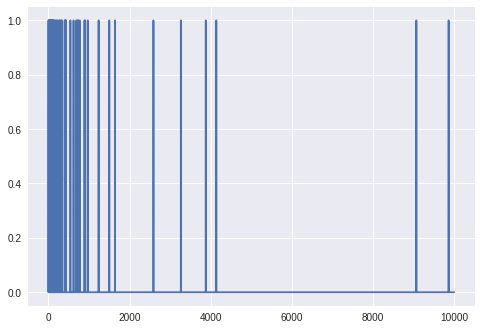

In [18]:
# for all indexes, more of the 1 values are near the 0 indexes
plt.plot(train_data[20])

In [19]:
#creating a baseline model

baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4964 - acc: 0.7869 - binary_crossentropy: 0.4964 - val_loss: 0.3367 - val_acc: 0.8751 - val_binary_crossentropy: 0.3367
Epoch 2/20
 - 3s - loss: 0.2485 - acc: 0.9109 - binary_crossentropy: 0.2485 - val_loss: 0.2828 - val_acc: 0.8873 - val_binary_crossentropy: 0.2828
Epoch 3/20
 - 3s - loss: 0.1797 - acc: 0.9370 - binary_crossentropy: 0.1797 - val_loss: 0.2904 - val_acc: 0.8844 - val_binary_crossentropy: 0.2904
Epoch 4/20
 - 3s - loss: 0.1422 - acc: 0.9518 - binary_crossentropy: 0.1422 - val_loss: 0.3179 - val_acc: 0.8790 - val_binary_crossentropy: 0.3179
Epoch 5/20
 - 3s - loss: 0.1169 - acc: 0.9612 - binary_crossentropy: 0.1169 - val_loss: 0.3458 - val_acc: 0.8722 - val_binary_crossentropy: 0.3458
Epoch 6/20
 - 3s - loss: 0.0937 - acc: 0.9709 - binary_crossentropy: 0.0937 - val_loss: 0.3794 - val_acc: 0.8687 - val_binary_crossentropy: 0.3794
Epoch 7/20
 - 3s - loss: 0.0744 - acc: 0.9788 - binary_crossentropy:

In [21]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.relu)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [22]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 8.0591 - acc: 0.5000 - binary_crossentropy: 8.0591 - val_loss: 8.0591 - val_acc: 0.5000 - val_binary_crossentropy: 8.0591
Epoch 2/20
 - 3s - loss: 8.0591 - acc: 0.5000 - binary_crossentropy: 8.0591 - val_loss: 8.0591 - val_acc: 0.5000 - val_binary_crossentropy: 8.0591
Epoch 3/20
 - 3s - loss: 8.0591 - acc: 0.5000 - binary_crossentropy: 8.0591 - val_loss: 8.0591 - val_acc: 0.5000 - val_binary_crossentropy: 8.0591
Epoch 4/20
 - 3s - loss: 8.0591 - acc: 0.5000 - binary_crossentropy: 8.0591 - val_loss: 8.0591 - val_acc: 0.5000 - val_binary_crossentropy: 8.0591
Epoch 5/20
 - 3s - loss: 8.0591 - acc: 0.5000 - binary_crossentropy: 8.0591 - val_loss: 8.0591 - val_acc: 0.5000 - val_binary_crossentropy: 8.0591
Epoch 6/20
 - 3s - loss: 8.0591 - acc: 0.5000 - binary_crossentropy: 8.0591 - val_loss: 8.0591 - val_acc: 0.5000 - val_binary_crossentropy: 8.0591
Epoch 7/20
 - 3s - loss: 8.0591 - acc: 0.5000 - binary_crossentropy:

In [23]:
# bigger model

bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [24]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 19s - loss: 0.3494 - acc: 0.8538 - binary_crossentropy: 0.3494 - val_loss: 0.3060 - val_acc: 0.8748 - val_binary_crossentropy: 0.3060
Epoch 2/20
 - 18s - loss: 0.1373 - acc: 0.9494 - binary_crossentropy: 0.1373 - val_loss: 0.3583 - val_acc: 0.8642 - val_binary_crossentropy: 0.3583
Epoch 3/20
 - 18s - loss: 0.0438 - acc: 0.9878 - binary_crossentropy: 0.0438 - val_loss: 0.4302 - val_acc: 0.8708 - val_binary_crossentropy: 0.4302
Epoch 4/20
 - 18s - loss: 0.0064 - acc: 0.9993 - binary_crossentropy: 0.0064 - val_loss: 0.5945 - val_acc: 0.8686 - val_binary_crossentropy: 0.5945
Epoch 5/20
 - 18s - loss: 7.8515e-04 - acc: 1.0000 - binary_crossentropy: 7.8515e-04 - val_loss: 0.6779 - val_acc: 0.8712 - val_binary_crossentropy: 0.6779
Epoch 6/20
 - 18s - loss: 2.1922e-04 - acc: 1.0000 - binary_crossentropy: 2.1922e-04 - val_loss: 0.7152 - val_acc: 0.8708 - val_binary_crossentropy: 0.7152
Epoch 7/20
 - 18s - loss: 1.3532e-04 - acc: 1.

In [0]:
def plot_history(histories, key = 'binary_crossentropy'):
  plt.figure(figsize=(16, 10))
  
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')
    
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_', ' ').title())
  
  plt.legend()

  plt.xlim([0,max(history.epoch)])

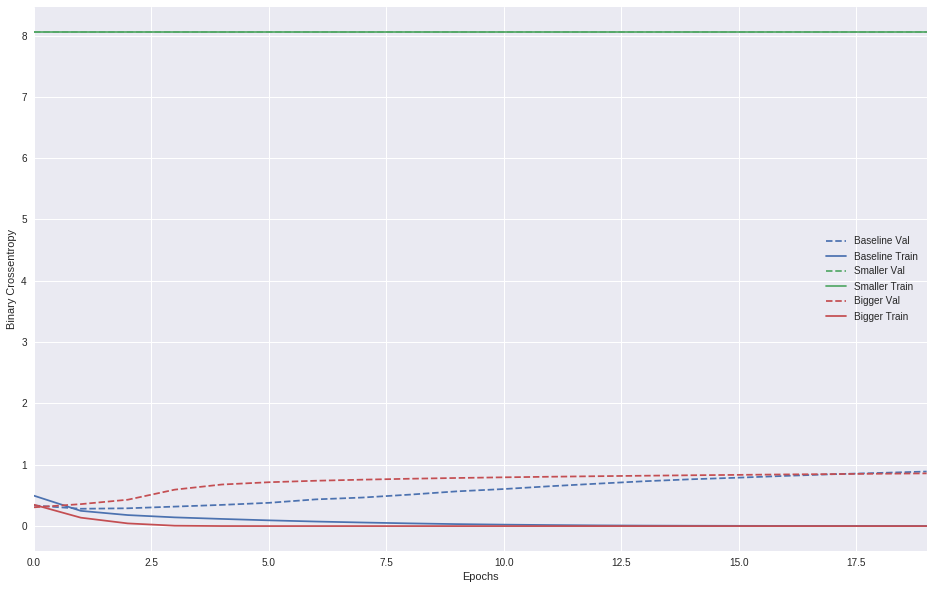

In [26]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [0]:
# As per Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is 
# the "simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by 
# neural networks: given some training data and a network architecture, there are multiple sets of weights values 
# (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.
# A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model 
# with fewer parameters altogether).


In [27]:
# base layer after normalization 

l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5391 - acc: 0.8088 - binary_crossentropy: 0.4981 - val_loss: 0.4011 - val_acc: 0.8715 - val_binary_crossentropy: 0.3590
Epoch 2/20
 - 3s - loss: 0.3230 - acc: 0.9028 - binary_crossentropy: 0.2764 - val_loss: 0.3407 - val_acc: 0.8869 - val_binary_crossentropy: 0.2908
Epoch 3/20
 - 3s - loss: 0.2694 - acc: 0.9228 - binary_crossentropy: 0.2170 - val_loss: 0.3364 - val_acc: 0.8868 - val_binary_crossentropy: 0.2824
Epoch 4/20
 - 3s - loss: 0.2434 - acc: 0.9352 - binary_crossentropy: 0.1879 - val_loss: 0.3422 - val_acc: 0.8848 - val_binary_crossentropy: 0.2859
Epoch 5/20
 - 3s - loss: 0.2287 - acc: 0.9401 - binary_crossentropy: 0.1710 - val_loss: 0.3542 - val_acc: 0.8811 - val_binary_crossentropy: 0.2958
Epoch 6/20
 - 4s - loss: 0.2157 - acc: 0.9473 - binary_crossentropy: 0.1567 - val_loss: 0.3644 - val_acc: 0.8786 - val_binary_crossentropy: 0.3052
Epoch 7/20
 - 4s - loss: 0.2083 - acc: 0.9500 - binary_crossentropy:

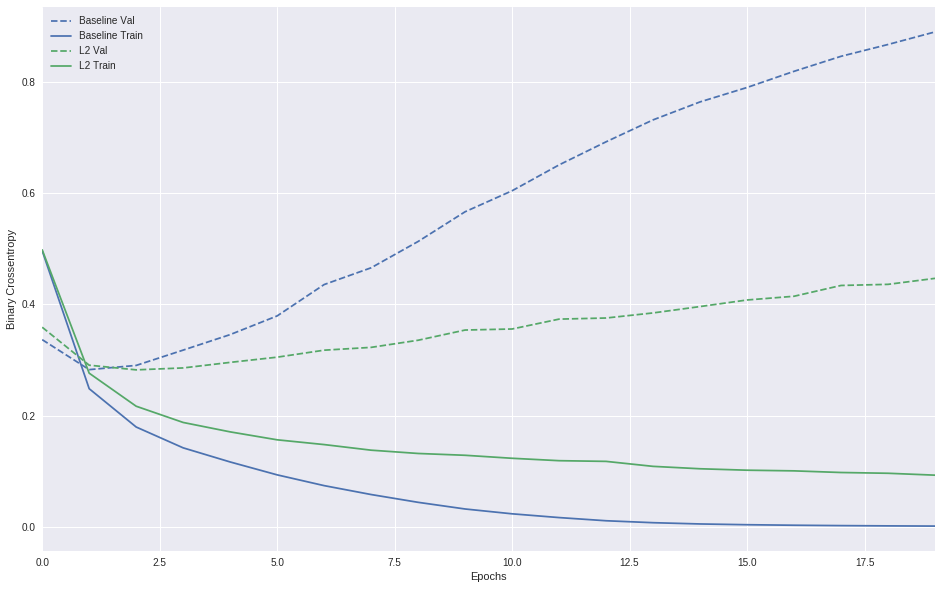

In [28]:
# comparing regularised model with the baseline

plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [29]:
# using dropout

dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6317 - acc: 0.6286 - binary_crossentropy: 0.6317 - val_loss: 0.5202 - val_acc: 0.8565 - val_binary_crossentropy: 0.5202
Epoch 2/20
 - 3s - loss: 0.4825 - acc: 0.7998 - binary_crossentropy: 0.4825 - val_loss: 0.3896 - val_acc: 0.8749 - val_binary_crossentropy: 0.3896
Epoch 3/20
 - 3s - loss: 0.3768 - acc: 0.8683 - binary_crossentropy: 0.3768 - val_loss: 0.3120 - val_acc: 0.8872 - val_binary_crossentropy: 0.3120
Epoch 4/20
 - 3s - loss: 0.3135 - acc: 0.8986 - binary_crossentropy: 0.3135 - val_loss: 0.2895 - val_acc: 0.8874 - val_binary_crossentropy: 0.2895
Epoch 5/20
 - 3s - loss: 0.2666 - acc: 0.9172 - binary_crossentropy: 0.2666 - val_loss: 0.2814 - val_acc: 0.8870 - val_binary_crossentropy: 0.2814
Epoch 6/20
 - 3s - loss: 0.2367 - acc: 0.9284 - binary_crossentropy: 0.2367 - val_loss: 0.2905 - val_acc: 0.8858 - val_binary_crossentropy: 0.2905
Epoch 7/20
 - 3s - loss: 0.2125 - acc: 0.9354 - binary_crossentropy:

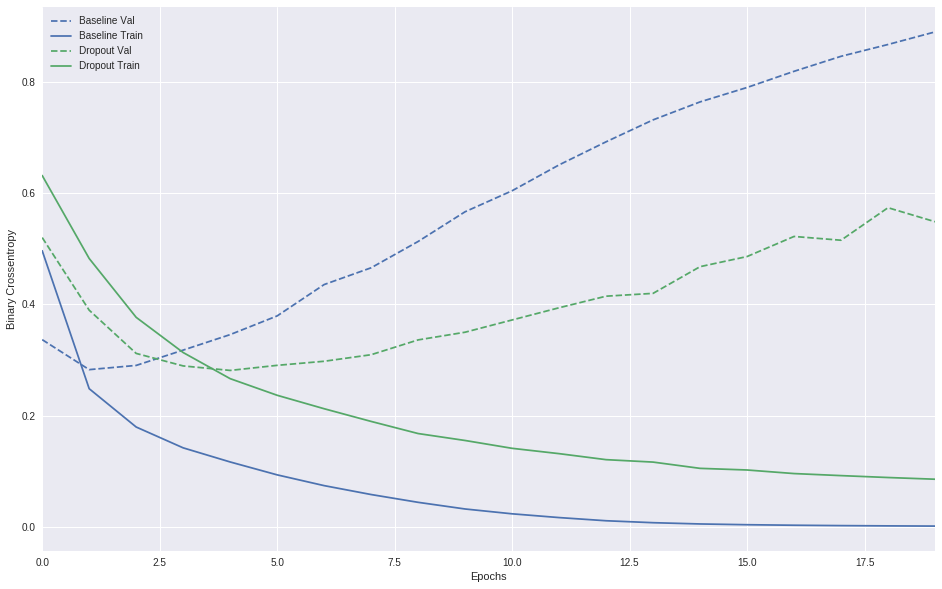

In [30]:
# comparing dropout with baseline model 

plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])